In [44]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.layers import Input

In [64]:
# Load the data
df = pd.read_csv('TSLA.csv')

In [65]:
# Print the first few rows of the data
print(df.head())

# Check the data types of each column
print(df.dtypes)

# Check for missing values
print(df.isnull().sum())

        SDate   Open   High    Low  Close  Adj Close    Volume
0  29-06-2010  3.800  5.000  3.508  4.778      4.778  93831500
1  30-06-2010  5.158  6.084  4.660  4.766      4.766  85935500
2  01-07-2010  5.000  5.184  4.054  4.392      4.392  41094000
3  02-07-2010  4.600  4.620  3.742  3.840      3.840  25699000
4  06-07-2010  4.000  4.000  3.166  3.222      3.222  34334500
SDate         object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object
SDate        0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [66]:
# Convert the 'Date' column to datetime format
df['SDate'] = pd.to_datetime(df['SDate'], dayfirst=True)

# Set the 'Date' column as the index
df.set_index('SDate')

# Fill missing values with the previous day's value
df.ffill(inplace=True)

In [67]:
# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]

In [68]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the training data and transform both the training and testing data
train_scaled = scaler.fit_transform(train_data.drop('SDate', axis=1))
test_scaled = scaler.transform(test_data.drop('SDate', axis=1))

In [69]:
# Split the scaled data into input and output sequences
def split_sequence(sequence, n_steps):
    X, y = [], []
    for i in range(len(sequence)):
        # Find the end of this pattern
        end_ix = i + n_steps
        # Check if we are beyond the dataset
        if end_ix > len(sequence)-1:
            break
        # Gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

n_steps = 30  # Number of time steps to look back
X_train, y_train = split_sequence(train_scaled, n_steps)
X_test, y_test = split_sequence(test_scaled, n_steps)

In [70]:
# Separate the datetime column from the numerical columns
datetime_column = train_data['SDate']
numerical_columns = train_data[[col for col in train_data.columns if train_data[col].dtype in ['int64', 'float64']]]

test_datetime_column = test_data['SDate']
test_numerical_columns = test_data[[col for col in test_data.columns if test_data[col].dtype in ['int64', 'float64']]]

# Convert the datetime columns to numerical format
datetime_column_num = (datetime_column - pd.to_datetime('1970-01-01')).dt.total_seconds()
test_datetime_column_num = (test_datetime_column - pd.to_datetime('1970-01-01')).dt.total_seconds()

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the training data and transform both the training and testing data
train_scaled = scaler.fit_transform(numerical_columns)
test_scaled = scaler.transform(test_numerical_columns)

# Combine the scaled numerical columns and the numerical datetime columns
train_scaled = np.concatenate((train_scaled, datetime_column_num.values.reshape(-1, 1)), axis=1)
test_scaled = np.concatenate((test_scaled, test_datetime_column_num.values.reshape(-1, 1)), axis=1)

In [71]:
# Split the scaled data into input and output sequences
def split_sequence(sequence, n_steps):
    X, y = [], []
    for i in range(len(sequence)):
        # Find the end of this pattern
        end_ix = i + n_steps
        # Check if we are beyond the dataset
        if end_ix > len(sequence)-1:
            break
        # Gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

n_steps = 30  # Number of time steps to look back
X_train, y_train = split_sequence(train_scaled, n_steps)
X_test, y_test = split_sequence(test_scaled, n_steps)

In [72]:
print(X_train.shape)

(2334, 30, 7)


In [73]:
X_train = X_train.reshape((X_train.shape[0], 210))
X_train = X_train.reshape((X_train.shape[0], 30, 7))
X_test = X_test.reshape((X_test.shape[0], 210))
X_test = X_test.reshape((X_test.shape[0], 30, 7))

In [74]:
model = Sequential()
model.add(Input(shape=(30, 7)))  # Define the input shape here
model.add(LSTM(50))  # Replace 50 with the number of units you want
model.add(Dense(1))  # Replace 1 with the number of output units you want
model.compile(loss='mean_squared_error', optimizer='adam')

In [75]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2)

Epoch 1/50
73/73 - 2s - 21ms/step - loss: 292216380680306688.0000
Epoch 2/50
73/73 - 0s - 5ms/step - loss: 292216311960829952.0000
Epoch 3/50
73/73 - 0s - 5ms/step - loss: 292216311960829952.0000
Epoch 4/50
73/73 - 0s - 5ms/step - loss: 292216415040045056.0000
Epoch 5/50
73/73 - 0s - 5ms/step - loss: 292216311960829952.0000
Epoch 6/50
73/73 - 0s - 5ms/step - loss: 292216277601091584.0000
Epoch 7/50
73/73 - 0s - 5ms/step - loss: 292216415040045056.0000
Epoch 8/50
73/73 - 0s - 5ms/step - loss: 292216311960829952.0000
Epoch 9/50
73/73 - 0s - 5ms/step - loss: 292216346320568320.0000
Epoch 10/50
73/73 - 0s - 5ms/step - loss: 292216380680306688.0000
Epoch 11/50
73/73 - 0s - 5ms/step - loss: 292216415040045056.0000
Epoch 12/50
73/73 - 0s - 5ms/step - loss: 292216346320568320.0000
Epoch 13/50
73/73 - 0s - 5ms/step - loss: 292216311960829952.0000
Epoch 14/50
73/73 - 0s - 5ms/step - loss: 292216415040045056.0000
Epoch 15/50
73/73 - 0s - 5ms/step - loss: 292216346320568320.0000
Epoch 16/50
73/73 

In [76]:
# Make predictions
y_pred = model.predict(X_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [77]:
# Evaluate the model
mse = model.evaluate(X_test, y_test)
print(f'MSE: {mse:.2f}')

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 364711992662949888.0000  
MSE: 371761133507313664.00


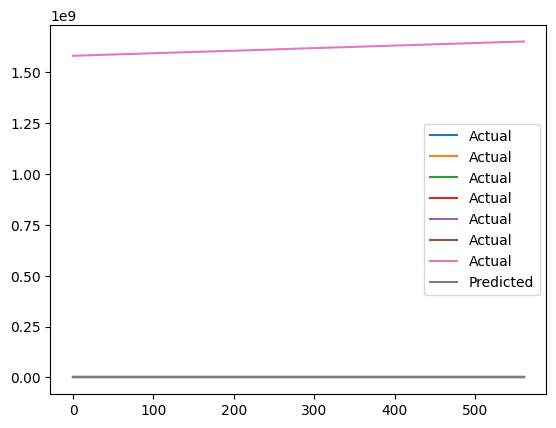

In [78]:
# Plot the predictions
import matplotlib.pyplot as plt

plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()